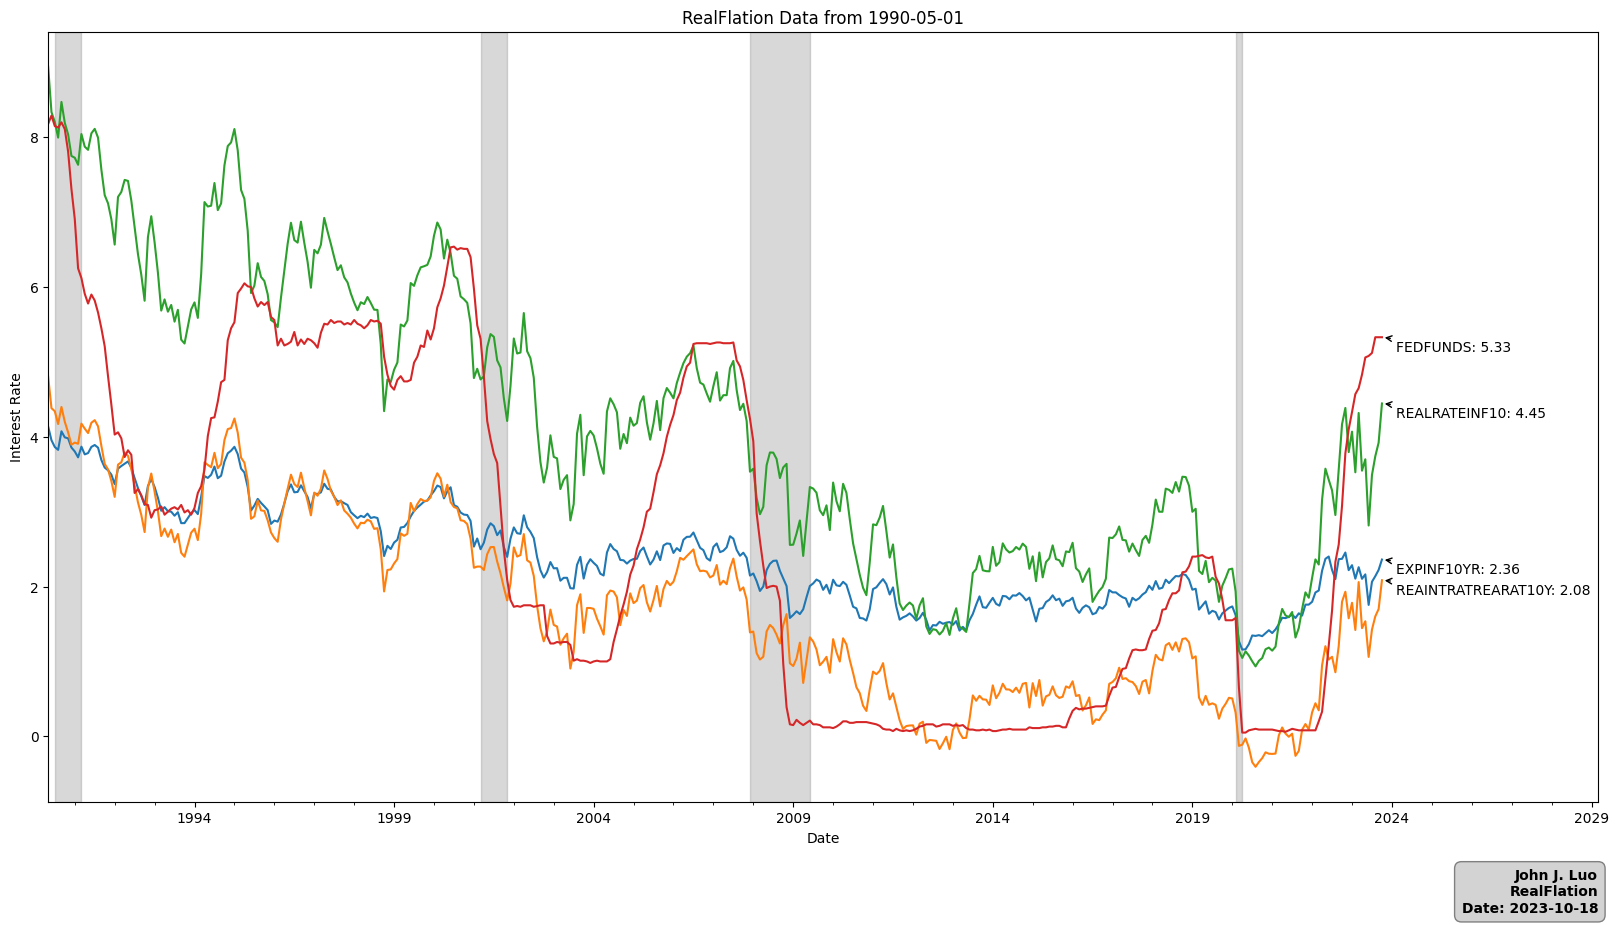

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mpl_dates, \
    math, dateutil.parser, datetime, sys, pandas_market_calendars as mcal
from statsmodels.stats.weightstats import DescrStatsW
from datetime import date
from scipy import stats
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as pdr


# Function to construct the RealFlation DataFrame from the 'RealRate.csv' file
def constructDF():
    RealFlation = pd.read_csv('RealRate.csv')
    RealFlation.index = pd.to_datetime(RealFlation['Date'], format='mixed')
    return RealFlation

# Function to construct the recessions DataFrame from the 'recessions.csv' file
def constructRec():
    recessions_df = pd.read_csv('recessions.csv', parse_dates=['start', 'end'])
    return recessions_df

# Function to add a signature bar with text to the given figure
def signaturebar(fig, text):
    fig.text(0.90, 0.02, text, ha='right', va='center', fontsize=10, color='black', weight='bold', bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

if __name__ == "__main__":
    arbitrary_start_date = None
    offsetDays = 2000
    
    # Construct the RealFlation DataFrame
    RealFlation = constructDF()
    
    # Set the arbitrary start date if not provided
    if arbitrary_start_date is None:
        arbitrary_start_date = RealFlation.index[1]
    
    # Filter the RealFlation DataFrame based on the arbitrary start date
    RealFlation_filtered = RealFlation.loc[arbitrary_start_date:]
    
    # Plot the filtered RealFlation data
    RealFlation_filtered.plot(figsize=(20, 10), legend=None)
    plt.title('RealFlation Data from {}'.format(arbitrary_start_date.date()))
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    
    # Set x-axis limits to include additional offset days
    x_min = RealFlation_filtered.index.min()
    x_max = RealFlation_filtered.index.max() + pd.DateOffset(days=offsetDays)
    plt.xlim(x_min, x_max)
    
    # Construct the recessions DataFrame
    recessions_df = constructRec()
    
    # Add shaded areas to represent recession periods
    for _, row in recessions_df.iterrows():
        plt.axvspan(row['start'], row['end'], color='grey', alpha=0.3, label='Recession Period')
    
    # Annotate the end values of specific columns on the plot
    for column in ['EXPINF10YR', 'REAINTRATREARAT10Y', 'REALRATEINF10', 'FEDFUNDS']:
        end_date = RealFlation_filtered.index[-1]
        end_value = RealFlation_filtered[column].iloc[-1]
        plt.annotate(f'{column}: {end_value:.2f}', xy=(end_date, end_value),
                     xytext=(10, -10), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->"))
    
    # Add signature text to the plot
    signature_text = 'John J. Luo\nRealFlation\nDate: {}'.format(pd.Timestamp.now().date())
    signaturebar(plt.gcf(), signature_text)
    
    # Display the plot
    plt.show()
